<a href="https://colab.research.google.com/github/tusharsachan15/PERCEPTION_LAB/blob/main/IMAGE_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb, slic
from skimage.color import rgb2gray
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction import image as skimage_image
from sklearn.cluster import spectral_clustering

In [ ]:
# Function to display image
def display_image(title, image, cmap=None):
 plt.figure(figsize=(8, 8))
 plt.imshow(image, cmap=cmap)
 plt.title(title)
 plt.axis('off')
 plt.show()

In [ ]:
# Resize image to reduce memory usage
def resize_image(image, scale_percent):
 width = int(image.shape[1] * scale_percent / 100)
 height = int(image.shape[0] * scale_percent / 100)
 dim = (width, height)
 resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
 return resized_image

In [ ]:
# Load the input image
image_path = r"/content/f1.jpg"
image = cv2.imread(image_path)

In [ ]:
# Check if the image was loaded successfully
if image is None:
 print(f"Error: Unable to load image at {image_path}")
else:
 image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 image = resize_image(image, 25) # Resize to 25% of original size


# 1. Graph-Based Segmentation (Felzenszwalb Algorithm)

In [ ]:
 def graph_based_segmentation(image):
  segments = felzenszwalb(image, scale=100, sigma=0.5, min_size=50)
  display_image("Graph-Based Segmentation", segments)

 # 2. Probabilistic Aggregation (Agglomerative Clustering with subsampling)


In [ ]:
 def probabilistic_aggregation(image):
  gray_image = rgb2gray(image)
  X = gray_image.reshape(-1, 1)

  # Subsample the data to avoid memory overload
  sample_size = 10000 # Adjust based on memory
  indices = np.random.choice(X.shape[0], sample_size, replace=False)
  X_sampled = X[indices]
  cluster = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
  labels_sampled = cluster.fit_predict(X_sampled)
  # Create a segmented image by mapping labels back to the original image shape
  segmented_image = np.zeros_like(gray_image)
  segmented_image.flat[indices] = labels_sampled
  display_image("Probabilistic Aggregation (Agglomerative Clustering)", segmented_image,cmap='gray')


# 3. Mean Shift Segmentation



In [ ]:
 def mean_shift_segmentation(image):
  spatial_radius = 40
  color_radius = 50
  mean_shift_image = cv2.pyrMeanShiftFiltering(image, spatial_radius, color_radius)
  display_image("Mean Shift Segmentation", mean_shift_image)

# 4. Normalized Cuts Segmentation (Spectral Clustering)


In [ ]:
 def normalized_cuts_segmentation(image):
  gray_image = rgb2gray(image)
  graph = skimage_image.img_to_graph(gray_image)
  labels = spectral_clustering(graph, n_clusters=10, eigen_solver='arpack')
  segmented_image = labels.reshape(gray_image.shape)
  display_image("Normalized Cuts Segmentation (Spectral Clustering)", segmented_image, cmap='gray')

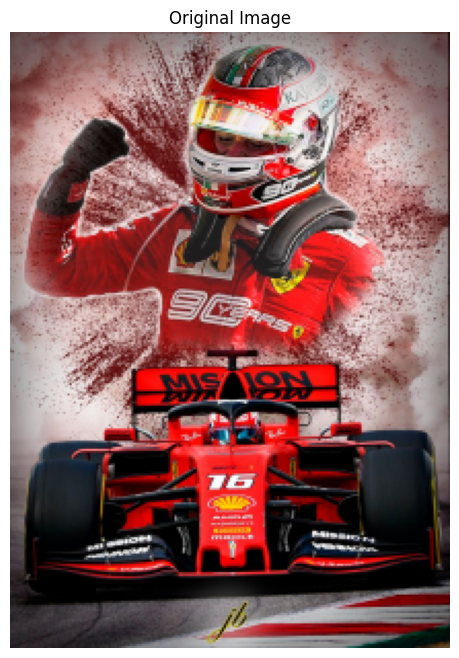

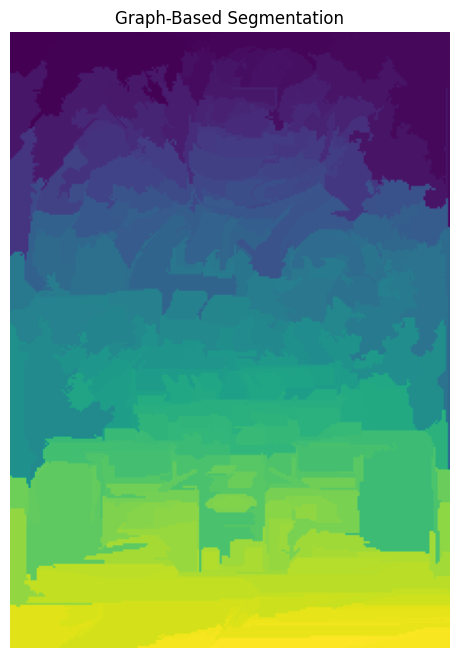

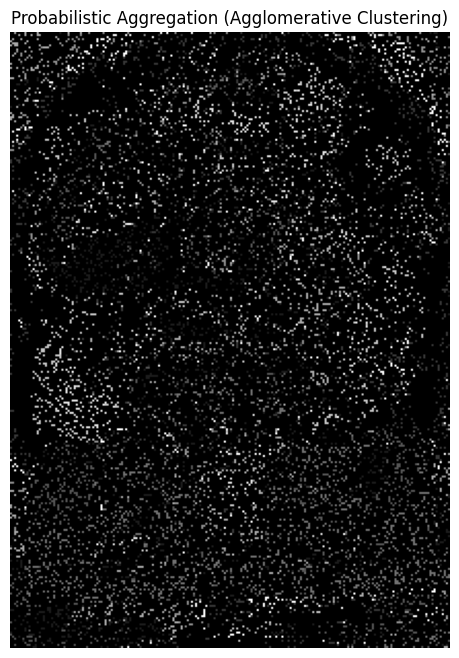

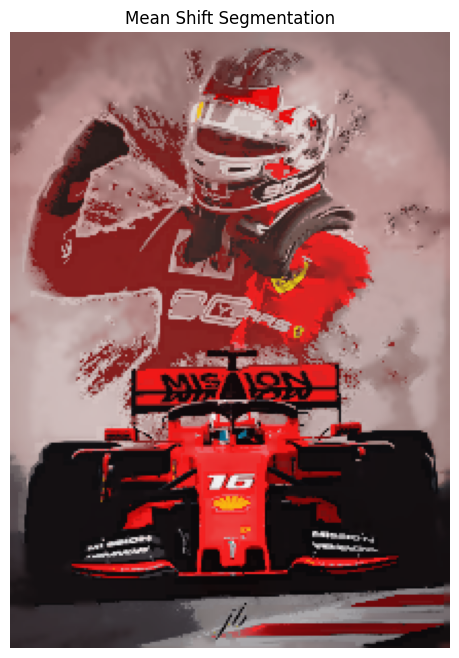

In [ ]:
# Call each segmentation function
display_image("Original Image", image)
graph_based_segmentation(image)
probabilistic_aggregation(image)
mean_shift_segmentation(image)
normalized_cuts_segmentation(image)